9. Закрепление знаний

In [1]:
import pandas as pd

import plotly
import plotly.express as px

import matplotlib.pyplot as plt
%matplotlib inline



In [28]:
churn_data = pd.read_csv('data/churn.csv')

In [29]:
churn_data = churn_data.drop('RowNumber', axis=1) 
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [30]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

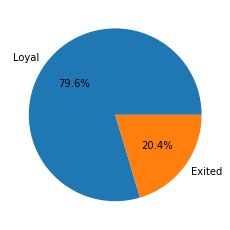

In [38]:
loyality_clients = churn_data['Exited'].value_counts()

fig = plt.figure(figsize=(3, 3))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    loyality_clients,
    labels=['Loyal','Exited'],
    autopct='%.1f%%'
);

In [33]:
churn_data.pivot_table(
    values='EstimatedSalary',
    index='Geography',
    columns='Exited',
    aggfunc='count',
)

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


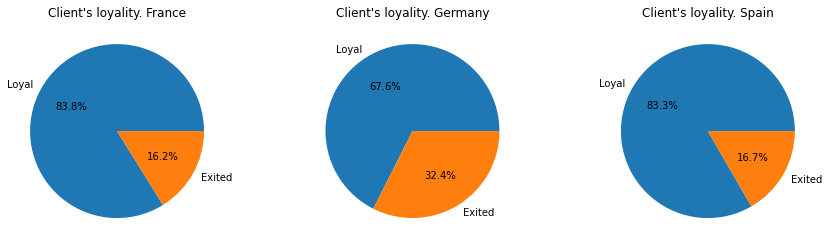

In [35]:
# фильтруем по странам
mask_fr = churn_data["Geography"] == "France"
mask_ge = churn_data["Geography"] == "Germany"
mask_sp = churn_data["Geography"] == "Spain"

loyality_fr = churn_data[mask_fr]['Exited'].value_counts()
loyality_ge = churn_data[mask_ge]['Exited'].value_counts()
loyality_sp = churn_data[mask_sp]['Exited'].value_counts()

# визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# круговая диаграмма
axes[0].pie(
    loyality_fr,
    labels=['Loyal','Exited'],
    autopct='%.1f%%'
)
axes[0].set_title("Client's loyality. France");

# круговая диаграмма
axes[1].pie(
    loyality_ge,
    labels=['Loyal','Exited'],
    autopct='%.1f%%'
)
axes[1].set_title("Client's loyality. Germany");
# круговая диаграмма
axes[2].pie(
    loyality_sp,
    labels=['Loyal','Exited'],
    autopct='%.1f%%'
)
axes[2].set_title("Client's loyality. Spain");


По наблюдаемым диаграммам видим:
1. Общий отток клиентов банка составляет примерно 20%, что достаточно крупный показатель.
2. Причем максимальное значение этот показатель принимает в Германии. Примерно треть клиентов банка не становятся постоянными клиентами.
3. Франция и Испания имеют схожие между собой картины по этому фактору. 

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [39]:
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


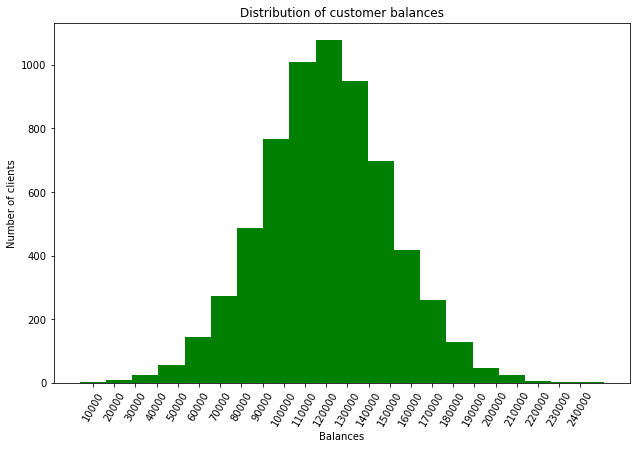

In [66]:
mask_income = churn_data["Balance"] >= 2500

#визуализация главного графика
fig = plt.figure(figsize=(8, 5))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(
    x=churn_data[mask_income]["Balance"], label=["Distribution of customer balances"], color="green", bins=20
);
main_axes.set_title("Distribution of customer balances");
main_axes.set_xlabel('Balances')
main_axes.set_ylabel('Number of clients')
main_axes.set_xticks([x*10000 for x in range(1, 25)])
main_axes.xaxis.set_tick_params(rotation=60)

На гистограмме видим:
1. Основная часть клиентов держат на аккаунтах в банке от 50 000 у.е до 200 000 у.е.
2. Модальное значение для баланса находится в районе 120 000-125 000 у.е.
3. Распределение клиентов по величине баланса близко н нормальному, без аномалий и выбросов.